In [1]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np

In [3]:
cancer = load_breast_cancer()

malignant = cancer.data[cancer.target == 1]
benign = cancer.data[cancer.target == 0]

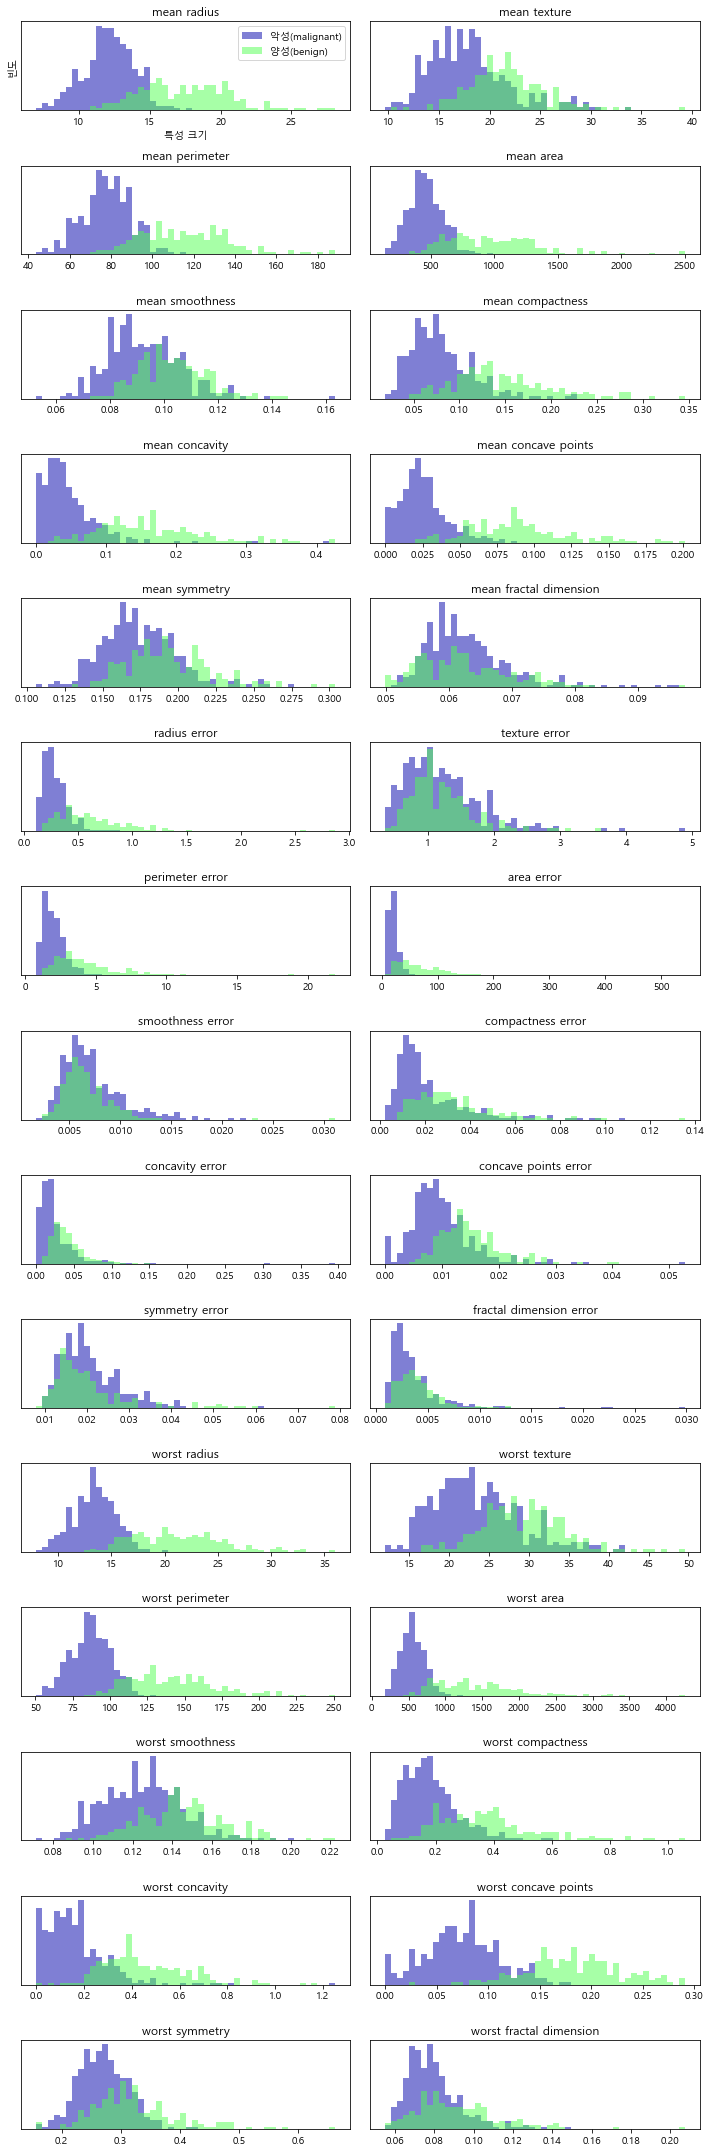

In [4]:
import mglearn

fig, axes = plt.subplots(15, 2, figsize=(10, 30))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성(malignant)", "양성(benign)"], loc="best")
fig.tight_layout()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [8]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print('원본, PCA변형', X_scaled.shape, X_pca.shape)

원본, PCA변형 (569, 30) (569, 2)


Text(0, 0.5, '두 번째 주성분')

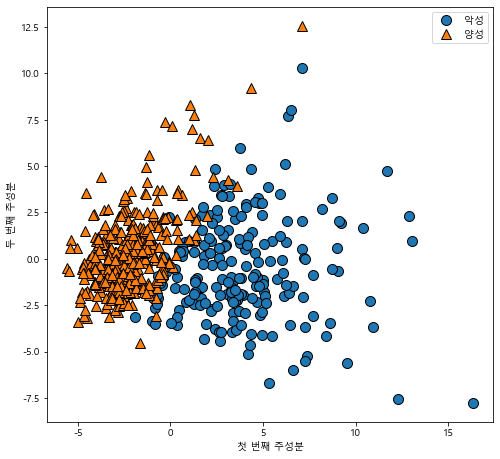

In [9]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 표시
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

Text(0, 0.5, '주성분')

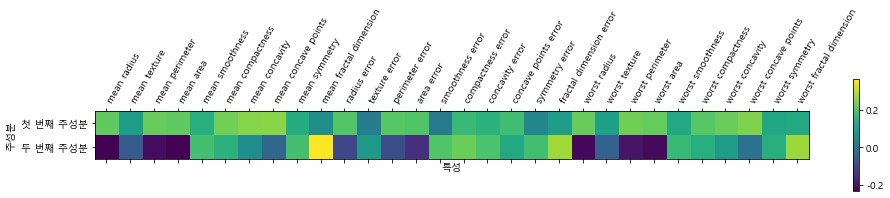

In [10]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [11]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('원본, PCA변형', X_scaled.shape, X_pca.shape)

원본, PCA변형 (569, 30) (569, 5)


Text(0, 0.5, '주성분')

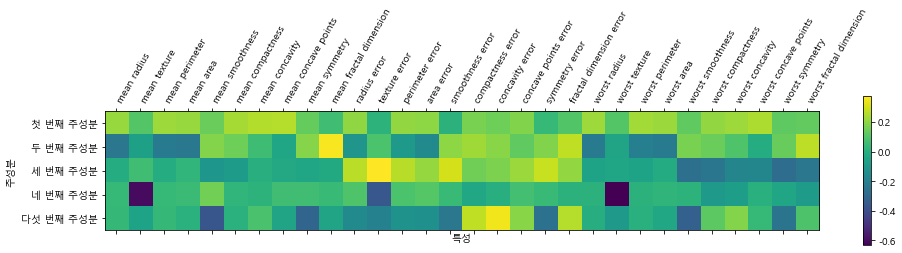

In [19]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3, 4], ["첫 번째 주성분", "두 번째 주성분", "세 번째 주성분", "네 번째 주성분", "다섯 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [26]:
import pandas as pd
train = pd.DataFrame(cancer.data, columns=cancer.feature_names)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [28]:
train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [30]:
iris = sns.load_dataset("iris")

X_iris = iris.drop("species", axis=1)
y_iris = iris['species']

print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [31]:
model = PCA()
X_pca_dat = model.fit(X_iris).transform(X_iris)
print(X_pca_dat.shape, type(X_pca_dat) )

(150, 4) <class 'numpy.ndarray'>


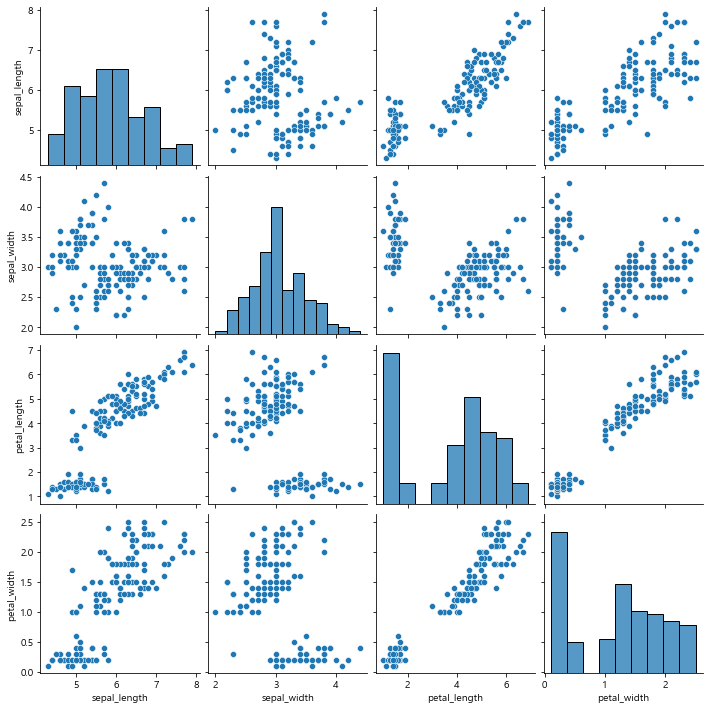

In [32]:
sns.pairplot(data=iris)  #  원본 데이터 산점도

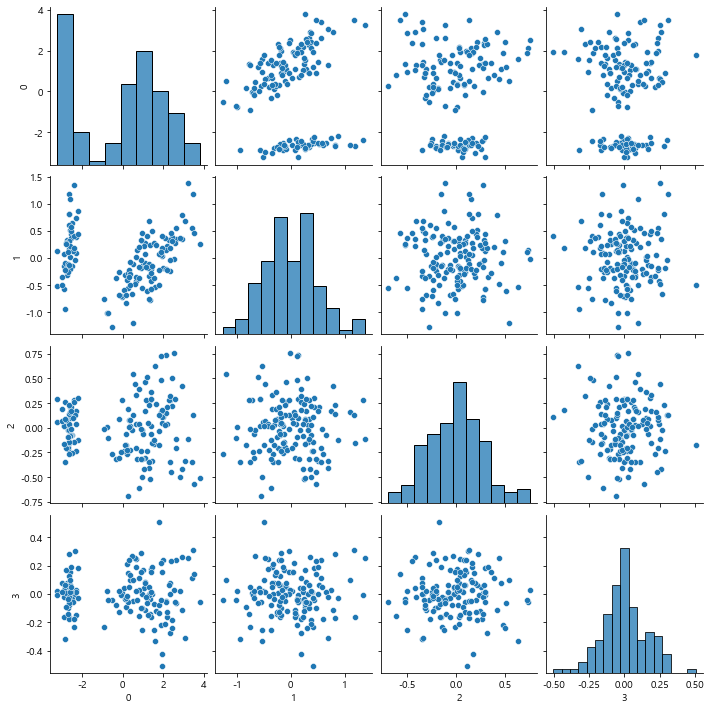

In [33]:
import pandas as pd

df = pd.DataFrame(X_pca_dat[0:,0:])
sns.pairplot(df)

In [34]:
model = PCA(n_components=2)
X_pca2 = model.fit(X_iris).transform(X_iris)
print(X_pca2.shape, type(X_pca_dat) )
print(X_pca2)

(150, 2) <class 'numpy.ndarray'>
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


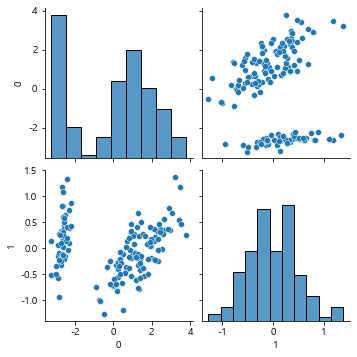

In [35]:
# df = pd.DataFrame(X_pca2[0:,0:])
df = pd.DataFrame(X_pca2)
sns.pairplot(df)
df.head(10)

C:\Users\bman4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


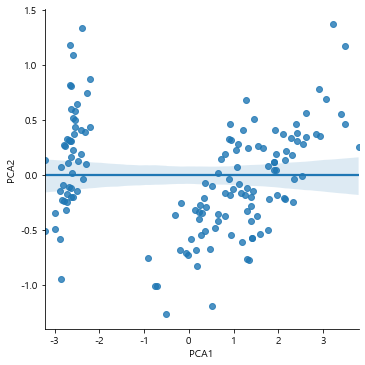

In [36]:
iris['PCA1'] = df.iloc[:,0]  # feature 생성
iris['PCA2'] = df.iloc[:,1]  # feature 생성
sns.lmplot('PCA1', 'PCA2', data=iris, fit_reg=True)

In [37]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,PCA1,PCA2
sepal_length,1.000000,-0.117570,0.871754,0.817941,8.974018e-01,3.906044e-01
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-3.987485e-01,8.252287e-01
petal_length,0.871754,-0.428440,1.000000,0.962865,9.978739e-01,-4.838060e-02
petal_width,0.817941,-0.366126,0.962865,1.000000,9.665475e-01,-4.878160e-02
PCA1,0.897402,-0.398748,0.997874,0.966548,1.000000e+00,7.841381e-16
PCA2,0.390604,0.825229,-0.048381,-0.048782,7.841381e-16,1.000000e+00


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9230769230769231

In [54]:
X = cancer.data
y = cancer.target
pca = PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9370629370629371